In [3]:
import numpy as np 
import nibabel as nib 
from glob import glob 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import argparse
import numpy as np 
#import pingouin as pg
#!pip install pingouin
#import pingouin as pg
#pg.partial_corr(data=df, x='A', y='B', covar='Z')
import pandas as pd 

from numpy.testing import assert_array_almost_equal



work_dir="/data/NIMH_scratch/kleinrl/ds003216-download/derivatives/sub-02/VASO_fun2_javier"
data_dir=work_dir+"/data"
out_dir=work_dir+"/out"
roi_dir=work_dir+"/rois"
timeseries_maindir=work_dir+"/timeseries"
plot_dir=work_dir+"/plots"

gm_wo_ses13=timeseries_maindir+"/VASO_grandmean_WITHOUT-ses-13_spc"

tss=glob(gm_wo_ses13+"/*")
#print(tss)

ts_FEF_2D=glob(gm_wo_ses13+"/*FEF*.2D")
ts_FEF_1D=glob(gm_wo_ses13+"/*FEF*.1D")
ts_FEF_2D.sort()
ts_FEF_1D.sort()

ts_VIP_2D=glob(gm_wo_ses13+"/*VIP*.2D")
ts_VIP_1D=glob(gm_wo_ses13+"/*VIP*.1D")
ts_VIP_2D.sort()
ts_VIP_1D.sort()



VIP     = [ np.loadtxt(x) for x in ts_VIP_2D ] 
VIP_ind = np.concatenate([len(x)*[y] for x,y in zip(VIP, range(1,len(VIP)+1)) ])
VIP_cat = np.concatenate(VIP)

FEF     = [ np.loadtxt(x) for x in ts_FEF_2D ] 
FEF_ind = np.concatenate([len(x)*[y] for x,y in zip(FEF, range(1,len(FEF)+1)) ])
FEF_cat = np.concatenate(FEF)

ALL_cat = np.concatenate([FEF_cat, VIP_cat])
ALL_ind_roi = np.concatenate([[0 for x in range(len(FEF_cat))],[1 for x in range(len(VIP_cat))]])
ALL_ind_lay = np.concatenate([FEF_ind, VIP_ind])



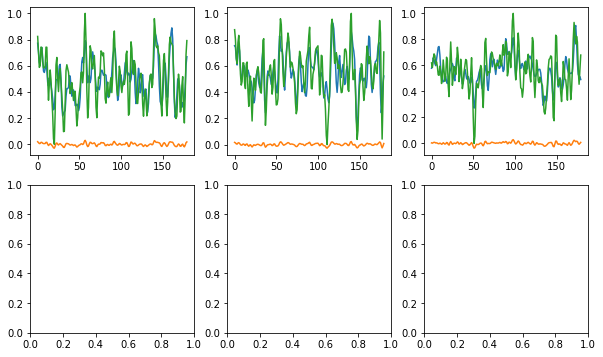

In [22]:


# JHF6673 Northcarolina


def get_pcas(X_train):
 

    scaler = MinMaxScaler()

    data_rescaled = scaler.fit_transform(X_train)

    #pca = PCA(n_components = 0.99)
    pca = PCA(n_components=30)

    pca.fit(data_rescaled)
    
    U, S, VT = np.linalg.svd(data_rescaled - data_rescaled.mean(0))
    #assert_array_almost_equal(VT[:30], pca.components_)
    
    
    data_pca = pca.transform(data_rescaled)
    exp_var = pca.explained_variance_ratio_

    rets = [] 
    # for i in range(data_pca.shape[1]): 
        
    #     recon_pc = data_pca[:,i].reshape([data_pca.shape[0],1])
    #     data_projected = pca.inverse_transform(recon_pc)

    #     #data_projected = pca.inverse_transform(data_pca)

    #     loss = np.sum((data_rescaled - data_projected) ** 2, axis=1).mean()
        
    #     ret = {"pc":i, 
    #         "var_exp":exp_var[i], 
    #         "data_projected":data_projected, 
    #         "loss":loss}
        
    #     rets.append(ret)
        
    
    data_projected_all = pca.inverse_transform(data_pca)
    data_projected_all_mean += data_rescaled.mean() 
    
    loss_all = np.sum((data_rescaled - data_projected_all) ** 2, axis=1).mean()
    
    ret = {"pc":'all', 
        "var_exp":exp_var.sum(), 
        "data_projected":data_projected_all, 
        "loss":loss_all}

    rets.append(ret)
    
    

    ncols = 3
    fig, axs = plt.subplots(ncols=ncols, nrows=2, figsize=(10,6))#, layout="constrained")

    #p = axs[0, 0].imshow(cc)
    #plt.colorbar()
    #fig.colorbar(p, ax=axs[0,0], location='right', anchor=(0, 0.3), shrink=0.7)


    for i in range(ncols):
        

        axs[0, i].plot([x for x in range(data_projected_all.shape[0])], data_projected_all[:,i])
        #axs[0, i].plot([x for x in range(data_pca.shape[0])], data_pca[:,i])
        axs[0, i].plot([x for x in range(X_train.shape[0])], X_train[:,i])
        axs[0, i].plot([x for x in range(data_rescaled.shape[0])], data_rescaled[:,i])

        
        #plt.legend()

    return 
    

    return data_pca, data_projected_all, rets


data = FEF_cat.T

get_pcas(data)



Mean  (1848,)
Data after subtracting mean  (180, 1848) 

Covariance matrix  (1848, 1848) 

Eigen vectors  [[ 1.07970358e-02+0.j          1.32303724e-02+0.j
  -2.88116977e-03+0.j         ... -3.58583850e-03-0.00037726j
  -1.73594866e-02+0.j         -7.18901255e-04+0.j        ]
 [ 4.97374274e-03+0.j          1.01329053e-02+0.j
   8.71163941e-03+0.j         ...  4.70819138e-03-0.00616075j
  -1.48055425e-02+0.j         -1.32496880e-02+0.j        ]
 [ 1.39755614e-02+0.j          3.80681812e-03+0.j
  -3.74524503e-03+0.j         ... -4.19532765e-03+0.00031152j
  -4.01045912e-03+0.j          6.56148377e-04+0.j        ]
 ...
 [ 2.93882283e-02+0.j         -1.96716349e-02+0.j
  -2.86973912e-02+0.j         ...  2.81453544e-02-0.01263j
  -1.00979947e-02+0.j         -4.28950248e-02+0.j        ]
 [ 1.09831921e-03+0.j          3.85507271e-02+0.j
   1.48488878e-02+0.j         ... -6.87922714e-05-0.01127259j
  -5.04883664e-03+0.j          1.91339299e-02+0.j        ]
 [ 7.91460108e-03+0.j          3.8903

/usr/local/Anaconda/envs/py3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
/usr/local/Anaconda/envs/py3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
/usr/local/Anaconda/envs/py3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


Transformed data  (180, 1848)
Reconstruction loss  (0.00027001985370407155-5.978237582715352e-22j)


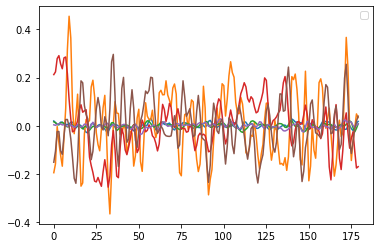

In [16]:

def get_pcas_2(data): 
    
    # data = FEF_cat.T
    
    # Subtract mean from data
    mean = np.mean(data, axis= 0)
    print("Mean ", mean.shape)
    mean_data = data - mean
    print("Data after subtracting mean ", data.shape, "\n")

        
    # Compute covariance matrix
    cov = np.cov(mean_data.T)
    #cov = np.round(cov, 2)
    print("Covariance matrix ", cov.shape, "\n")
        
    # Perform eigen decomposition of covariance matrix
    eig_val, eig_vec = np.linalg.eig(cov)
    print("Eigen vectors ", eig_vec)
    print("Eigen values ", eig_val, "\n")

    # Sort eigen values and corresponding eigen vectors in descending order
    indices = np.arange(0,len(eig_val), 1)
    indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
    eig_val = eig_val[indices]
    eig_vec = eig_vec[:,indices]
    print("Sorted Eigen vectors ", eig_vec)
    print("Sorted Eigen values ", eig_val, "\n")


    # Get explained variance
    sum_eig_val = np.sum(eig_val)
    explained_variance = eig_val/ sum_eig_val
    print(explained_variance)
    
    cumulative_variance = np.cumsum(explained_variance)
    print(cumulative_variance)


    # Take transpose of eigen vectors with data
    pca_data = np.dot(mean_data, eig_vec)
    print("Transformed data ", pca_data.shape)

    pca_data_1 = np.dot(mean_data, eig_vec[0,:])



    recon_data = pca_data 
    org_data = data 
    
    # Compute reconstruction loss
    #loss = np.mean(np.square(recon_data - org_data))
    loss = np.mean((recon_data - org_data)**2)
    print("Reconstruction loss ", loss)

    recon_data2 = recon_data +mean 
    
    for i in range(3):
        

        plt.plot([x for x in range(org_data.shape[0])], org_data[:,i])
        plt.plot([x for x in range(recon_data.shape[0])], recon_data2[:,i])
        
        #plt.legend()

    return 


data = FEF_cat.T

get_pcas_2(data)





In [1]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

X = sklearn.datasets.load_iris().data
mu = np.mean(X, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(X)

nComp = 2
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

print(Xhat[0,])

[5.08303897 3.51741393 1.40321372 0.21353169]


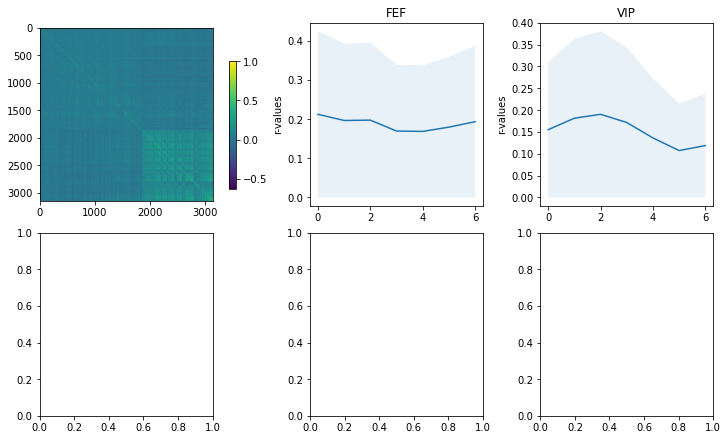

In [2]:
df = pd.DataFrame(ALL_cat.T, columns=[x for x in range(ALL_cat.shape[0])])

pg.partial_corr(data=df, x=0, y=1, covar=[2,3])




In [ ]:


def seed_valuation_plots(seed, ALL_cat, ALL_ind_roi, ALL_ind_lay, plot_name):


    ALL_height = ALL_cat.shape[0]
    c = np.zeros((ALL_height))
    for i in range(ALL_height):
        c[i] = np.corrcoef(seed, ALL_cat[i,:])[0,1]
    
    
    # ALL_height = ALL_cat.shape[0]
    # cc = np.zeros((ALL_height, ALL_height))
    # for i in range(ALL_height):
    #     for j in range(ALL_height):
    #         cc[i,j] = np.corrcoef(ALL_cat[i,:], ALL_cat[j,:])[0,1]
    
    cc = np.corrcoef(ALL_cat)
    
    
    

    FEF_ind = np.where(ALL_ind_roi == 0 )
    FEF_means = []
    FEF_stdevs = []

    VIP_means = []
    VIP_stdevs = []

    for i in range(1,8):
        FEF_means.append(np.mean(c[(ALL_ind_roi == 0) & (ALL_ind_lay == i )]))
        FEF_stdevs.append(np.mean(c[(ALL_ind_roi == 0) & (ALL_ind_lay == i )]))

        VIP_means.append(np.mean(c[(ALL_ind_roi == 1) & (ALL_ind_lay == i )]))
        VIP_stdevs.append(np.mean(c[(ALL_ind_roi == 1) & (ALL_ind_lay == i )]))


    FEF_means = np.array(FEF_means)
    FEF_stdevs = np.array(FEF_stdevs)

    VIP_means = np.array(VIP_means)
    VIP_stdevs = np.array(VIP_stdevs)





    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10,6), layout="constrained")

    p = axs[0, 0].imshow(cc)
    #plt.colorbar()
    fig.colorbar(p, ax=axs[0,0], location='right', anchor=(0, 0.3), shrink=0.7)



    axs[0, 1].plot(FEF_means)
    axs[0, 1].fill_between(range(7),FEF_means-FEF_stdevs,FEF_means+FEF_stdevs,alpha=.1)

    axs[0, 2].plot(VIP_means)
    axs[0, 2].fill_between(range(7),VIP_means-VIP_stdevs,VIP_means+VIP_stdevs,alpha=.1)

    axs[0,1].title.set_text("FEF")
    axs[0,2].title.set_text("VIP")

    axs[0,1].set(ylabel="r-values")
    axs[0,2].set(ylabel="r-values")

    fig.savefig(plot_dir+"/"+plot_name)
    



seed = FEF_l1_mean
plot_name ='seed_L1-FEF-VIP.png'
seed_valuation_plots(seed, ALL_cat, ALL_ind_roi, ALL_ind_lay, plot_name)


In [ ]:


def seed_valuation_plots(seed, ALL_cat, ALL_ind_roi, ALL_ind_lay, plot_name):


    ALL_height = ALL_cat.shape[0]
    c = np.zeros((ALL_height))
    for i in range(ALL_height):
        c[i] = np.corrcoef(seed, ALL_cat[i,:])[0,1]
    
    
    
    
    
    # ALL_height = ALL_cat.shape[0]
    # cc = np.zeros((ALL_height, ALL_height))
    # for i in range(ALL_height):
    #     for j in range(ALL_height):
    #         cc[i,j] = np.corrcoef(ALL_cat[i,:], ALL_cat[j,:])[0,1]
    
    cc = np.corrcoef(ALL_cat)
    
    
    

    FEF_ind = np.where(ALL_ind_roi == 0 )
    FEF_means = []
    FEF_stdevs = []

    VIP_means = []
    VIP_stdevs = []

    for i in range(1,8):
        FEF_means.append(np.mean(c[(ALL_ind_roi == 0) & (ALL_ind_lay == i )]))
        FEF_stdevs.append(np.mean(c[(ALL_ind_roi == 0) & (ALL_ind_lay == i )]))

        VIP_means.append(np.mean(c[(ALL_ind_roi == 1) & (ALL_ind_lay == i )]))
        VIP_stdevs.append(np.mean(c[(ALL_ind_roi == 1) & (ALL_ind_lay == i )]))


    FEF_means = np.array(FEF_means)
    FEF_stdevs = np.array(FEF_stdevs)

    VIP_means = np.array(VIP_means)
    VIP_stdevs = np.array(VIP_stdevs)





    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10,6), layout="constrained")

    p = axs[0, 0].imshow(cc)
    #plt.colorbar()
    fig.colorbar(p, ax=axs[0,0], location='right', anchor=(0, 0.3), shrink=0.7)



    axs[0, 1].plot(FEF_means)
    axs[0, 1].fill_between(range(7),FEF_means-FEF_stdevs,FEF_means+FEF_stdevs,alpha=.1)

    axs[0, 2].plot(VIP_means)
    axs[0, 2].fill_between(range(7),VIP_means-VIP_stdevs,VIP_means+VIP_stdevs,alpha=.1)

    axs[0,1].title.set_text("FEF")
    axs[0,2].title.set_text("VIP")

    axs[0,1].set(ylabel="r-values")
    axs[0,2].set(ylabel="r-values")

    fig.savefig(plot_dir+"/"+plot_name)
    



seed = FEF_l1_mean
plot_name ='seed_L1-FEF-VIP.png'
seed_valuation_plots(seed, ALL_cat, ALL_ind_roi, ALL_ind_lay, plot_name)


In [ ]:



ALL_height = ALL_cat.shape[0]
c = np.zeros((ALL_height))
for i in range(ALL_height):
    c[i] = np.corrcoef(seed, ALL_cat[i,:])[0,1]


# ALL_height = ALL_cat.shape[0]
# cc = np.zeros((ALL_height, ALL_height))
# for i in range(ALL_height):
#     for j in range(ALL_height):
#         cc[i,j] = np.corrcoef(ALL_cat[i,:], ALL_cat[j,:])[0,1]



# get PCs reconstruct 
# regress out average 

cc = np.corrcoef(ALL_cat)




FEF_ind = np.where(ALL_ind_roi == 0 )
FEF_means = []
FEF_stdevs = []

VIP_means = []
VIP_stdevs = []

for i in range(1,8):
    FEF_means.append(np.mean(c[(ALL_ind_roi == 0) & (ALL_ind_lay == i )]))
    FEF_stdevs.append(np.mean(c[(ALL_ind_roi == 0) & (ALL_ind_lay == i )]))

    VIP_means.append(np.mean(c[(ALL_ind_roi == 1) & (ALL_ind_lay == i )]))
    VIP_stdevs.append(np.mean(c[(ALL_ind_roi == 1) & (ALL_ind_lay == i )]))


FEF_means = np.array(FEF_means)
FEF_stdevs = np.array(FEF_stdevs)

VIP_means = np.array(VIP_means)
VIP_stdevs = np.array(VIP_stdevs)





fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10,6), layout="constrained")

p = axs[0, 0].imshow(cc)
#plt.colorbar()
fig.colorbar(p, ax=axs[0,0], location='right', anchor=(0, 0.3), shrink=0.7)



axs[0, 1].plot(FEF_means)
axs[0, 1].fill_between(range(7),FEF_means-FEF_stdevs,FEF_means+FEF_stdevs,alpha=.1)

axs[0, 2].plot(VIP_means)
axs[0, 2].fill_between(range(7),VIP_means-VIP_stdevs,VIP_means+VIP_stdevs,alpha=.1)

axs[0,1].title.set_text("FEF")
axs[0,2].title.set_text("VIP")

axs[0,1].set(ylabel="r-values")
axs[0,2].set(ylabel="r-values")

fig.savefig(plot_dir+"/"+plot_name)




seed = FEF_l1_mean
plot_name ='seed_L1-FEF-VIP.png'
seed_valuation_plots(seed, ALL_cat, ALL_ind_roi, ALL_ind_lay, plot_name)



In [ ]:
# FEF_height = FEF_cat.shape[0]
# c = np.zeros((FEF_height))
# for i in range(FEF_height):
#     c[i] = np.corrcoef(FEF_l1_mean, FEF_cat[i,:])[0,1]
    
    





fig, axs = plt.subplots(ncols=len_x, nrows=len_y, figsize=(30,30), #len_x,len_y
                        layout="constrained")
for seed_i in range(len_x):
    seed_lab = labs[seed_i]

    dfs = glob(dataframe_dir+"/*"+seed_lab+"*")
    dfs = [df for df in dfs if "SMOOTH" not in df ]

    nulls = [ df for df in dfs if "perm" in df ] 
    emps   = [ df for df in dfs if "perm" not in df ]

    for target_i in range(len_y):         
        target_lab = labs[target_i]
        target_id = inv_lab_dict[target_lab]
        null_vals, emp_vals  = [], [] 

        for df in nulls: 
            d = np.load(df) 
            d = d[:,1:]
            null_vals.append(d[target_id, : ])
        for df in emps: 
            d = np.load(df) 
            d = d[:,1:]
            emp_vals.append(d[target_id, : ])

        null_vals   = np.stack(null_vals)
        emp_vals    = np.stack(emp_vals) 

        null_means  = null_vals.mean(axis=0)
        null_stdevs  = null_vals.std(axis=0)

        emp_means   = emp_vals.mean(axis=0)
        emp_stdevs  = emp_vals.std(axis=0)

        axs[seed_i, target_i].plot(null_means)
        axs[seed_i, target_i].plot(emp_means)

        axs[seed_i, target_i].fill_between(range(7),null_means-null_stdevs,null_means+null_stdevs,alpha=.1)
        axs[seed_i, target_i].fill_between(range(7),emp_means-emp_stdevs,emp_means+emp_stdevs,alpha=.1)

        if seed_i == 0: 
            axs[seed_i, target_i].title.set_text(target_lab)

        if target_i == 0: 
            axs[seed_i, target_i].set(ylabel=seed_lab)

        
        #axs[seed_i, target_i].legend(['null', 'vaso'])

# ax_i = 0 
# for ax in axs.flat:
#     ax.set(ylabel=labs[ax_i]) #xlabel='x-label', 

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
      
fig.suptitle("V4abstract (Batch20 10iters)", fontsize=16)

fig.savefig(plot_dir+"/V4fig.png")







fig, axs = plt.subplot(rows=1, columns=3, figsize=(3,10))

axs[0,0] = plt.plot()
axs[0,0] = plt.plot()
axs[0,0] = plt.plot()




In [ ]:
print

In [5]:
seed_path           = roi_dir+"/LIPd_layers.nii.gz"
target_path         = roi_dir+"/FEF_layers.nii.gz"
epi_path            = data_dir+"/VASO_grandmean.nii"

seed_layers         = nib.load(seed_path)
target_layers       = nib.load(target_path)
epi                 = nib.load(epi_path)

seed_layer_data     = seed_layers.get_fdata()
target_layer_data   = target_layers.get_fdata()
epi_data            = epi.get_fdata() 

FileNotFoundError: No such file or no access: '/data/NIMH_scratch/kleinrl/ds003216-download/derivatives/sub-02/VASO_fun2_javier/data/VASO_grandmean.nii'

In [ ]:
unq_lay = np.unique(seed_layers)
seed_voxs = []
for l in unq_lay: 
    l_ind = np.where(seed_layers == l )
    l_voxs = epi_data[l_ind]
    seed_voxs.append(l_voxs)
    

unq_lay = np.unique(seed_layers)
seed_voxs = []
for l in unq_lay: 
    l_ind = np.where(seed_layers == l )
    l_voxs = epi_data[l_ind]
    seed_voxs.append(l_voxs)
    
    
    
    
    
    

In [ ]:
seed_epi_ts = []
seed_epi_prep_ts = [] 
seed_vox_count = []
seed_idx = []

for i in range(1,8):
    idx = np.where(seed_data == i )
    c = len(idx[0])
    
    print("layer {}: {} vox".format(i, c))
    
    seed_epi_ts.append(epi_data[idx])
    #seed_epi_prep_ts.append(epi_prep_data[idx])
    seed_vox_count.append(c)
    seed_idx.append([i]*c)

seed_epi_prep_ts    = np.concatenate(seed_epi_prep_ts)
seed_epi_ts         = np.stack(seed_epi_prep_ts)
seed_idx            = np.stack(seed_epi_prep_ts)

print(seed_epi_prep_ts.shape)
print(seed_epi_ts.shape)
print(seed_idx.shape)


target_epi_ts = []
target_epi_prep_ts = [] 
target_vox_count = []
target_idx = []
for i in range(1,8):
    idx = np.where(target_data == i )
    c = len(idx[0])
    
    print("layer {}: {} vox".format(i, c))
    
    target_epi_ts.append(epi_data[idx])
    #target_epi_prep_ts.append(epi_prep_data[idx])
    target_vox_count.append(c)
    target_idx.append([i]*c)
    
target_epi_prep_ts    = np.concatenate(target_epi_prep_ts)
target_epi_ts         = np.stack(target_epi_prep_ts)
target_idx            = np.stack(target_epi_prep_ts)

print(target_epi_prep_ts.shape)
print(target_epi_ts.shape)
print(target_idx.shape)
